In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(1)

In [2]:
N = 20
x = np.random.uniform(-1,1,N)
y = np.cos(x)+0.2*np.random.randn(N)

In [3]:
ks = (2,4,8)
x_grid = np.linspace(-1,1)
emp_risk = []
risk = []

In [4]:
N_t = 100000
x_t = np.random.uniform(-1,1,N_t)
y_t = np.cos(x_t)+0.2*np.random.randn(N_t)

u_t = y_t-np.cos(x_t)

mse_bound = sum(u_t**2)/N_t

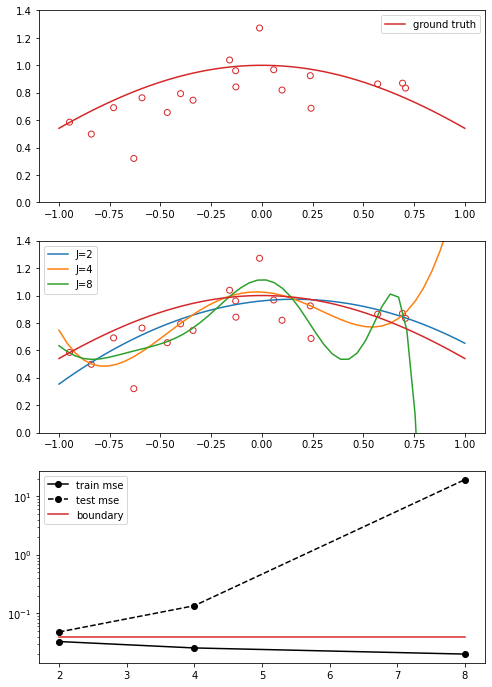

In [12]:
fig, axes = plt.subplots(3,1, figsize=(8,12))

axes[0].scatter(x,y, facecolor='none',edgecolors='tab:red')
axes[0].plot(x_grid, np.cos(x_grid), color='tab:red', label='ground truth')
axes[0].set(ylim=(0.,1.4))
axes[0].legend()

mse_train = []
mse_test = []

for k in ks:
    X = PolynomialFeatures(k).fit_transform(x[:,None])
    X_t = PolynomialFeatures(k).fit_transform(x_t[:,None])
    x_grid_ = PolynomialFeatures(k).fit_transform(x_grid[:,None])
    lin_reg = LinearRegression().fit(X,y)
    yhat = lin_reg.predict(x_grid_)
    # Hva er teoretisk og empirisk risiko??hmm.. jeg jobber med mse, hvordan skal jeg få beregnet. TODO i morgen.
    y_pred_train = lin_reg.predict(X)
    y_pred_test = lin_reg.predict(X_t)
    
    mse_train.append(mean_squared_error(y,y_pred_train))
    mse_test.append(mean_squared_error(y_t,y_pred_test))
    
    
    axes[1].plot(x_grid,yhat, linestyle='-', label=f'J={k}')
axes[1].plot(x_grid, np.cos(x_grid), color='tab:red')
axes[1].set(ylim=(0.,1.4))
axes[1].scatter(x,y, facecolor='none',edgecolors='tab:red')
axes[1].legend()

axes[2].plot(ks,mse_train,'-o', color='black', label='train mse')
axes[2].plot(ks,mse_test,'--o', color='black', label='test mse')
axes[2].plot(ks,[mse_bound]*3,'-',label='boundary', color='tab:red')
axes[2].legend()
axes[2].set_yscale('log')

# fig.savefig('polynom.pdf') # ikke informativ nok